In [ ]:
## 위험요인 vs 예방요인

## 설명변수 => 공변량(covariate)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 오류 해결
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


![컬럼명세](https://user-images.githubusercontent.com/35517797/70862044-38f0d580-1f7a-11ea-9234-54bd8644794c.PNG)

In [5]:
# slope,ca의 경우 수치형이 아닌 범주형으로 다룰 필요

category = ['sex','cp','fbs','restecg','exang','thal','slope','ca']
numeric = ['age','trestbps','chol','thalach','oldpeak']

In [6]:
# describe

# 수치형 데이터에 대한 탐색
df[numeric].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [7]:
# 심장병 유무별 데이터 탐색

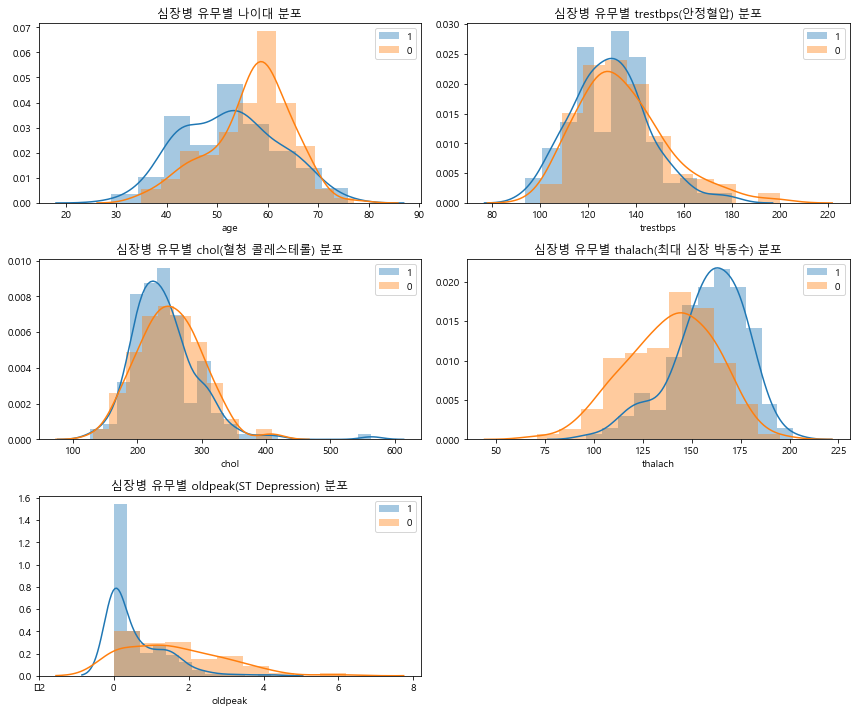

In [8]:
# numeric data visualization

plt.figure(figsize=(12,10))

ax1 = plt.subplot(321)

ax1 = sns.distplot(df[df.target == 1]['age'],label='1')
ax1 = sns.distplot(df[df.target == 0]['age'],label='0')

ax1.legend()
ax1.set_title('심장병 유무별 나이대 분포')


#######################################################

ax2 = plt.subplot(322)

ax2 = sns.distplot(df[df.target == 1]['trestbps'],label='1')
ax2 = sns.distplot(df[df.target == 0]['trestbps'],label='0')

ax2.legend()
ax2.set_title('심장병 유무별 trestbps(안정혈압) 분포')


#######################################################


ax3 = plt.subplot(323)

ax3 = sns.distplot(df[df.target == 1]['chol'],label='1')
ax3 = sns.distplot(df[df.target == 0]['chol'],label='0')

ax3.legend()
ax3.set_title('심장병 유무별 chol(혈청 콜레스테롤) 분포')


#######################################################


ax4 = plt.subplot(324)

sns.distplot(df[df.target == 1]['thalach'],label='1')
sns.distplot(df[df.target == 0]['thalach'],label='0')

ax4.legend()
ax4.set_title('심장병 유무별 thalach(최대 심장 박동수) 분포')


#######################################################


ax4 = plt.subplot(325)

sns.distplot(df[df.target == 1]['oldpeak'],label='1')
sns.distplot(df[df.target == 0]['oldpeak'],label='0')

ax4.legend()
ax4.set_title('심장병 유무별 oldpeak(ST Depression) 분포')

#######################################################

plt.tight_layout()
plt.show()

In [9]:
# categorical data visualization

## 시각화 함수 생성
plt_df = None
def bar_chart(feature,label):
    yes_heart = df[df.target == 1][feature].value_counts()
    no_heart = df[df.target == 0][feature].value_counts()  
    plt_df = pd.DataFrame([yes_heart,no_heart])
    plt_df.index = ['yes_heart','no_heart']
    
    plt_df.plot(kind='bar',stacked=True,figsize=(12,6)).legend(label,title=(feature))
    
    return plt_df

- ```성별```에 따른 생존,사망 여부 시각화

,1,0
yes_heart,93,72
no_heart,114,24


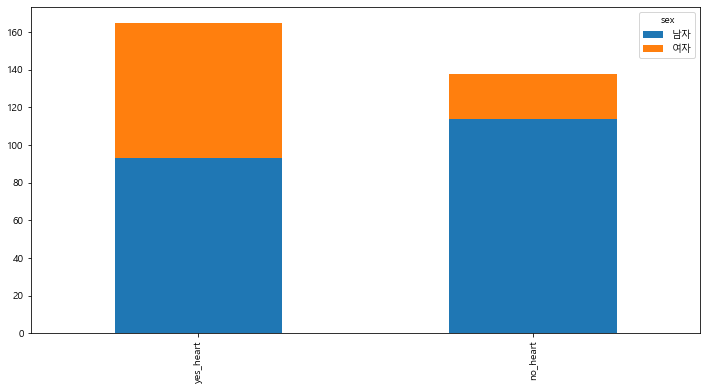

In [10]:
bar_chart('sex',['남자','여자'])

# 남자일수록 심장병 확률이 낮다?
# 심장병 있는경우 전체 165명중 93명이 남자 72명이 여자로 비슷
# 심장병이 없는경우 전체 138명중 114명이 남자 24명이 여자로 남성이 4.8배 가까이 많음
# => 남성이 여성에 비해 심장병에 걸리지 않을 확률이 낮다?

,0,1,2,3
yes_heart,39,41,69,16
no_heart,104,9,18,7


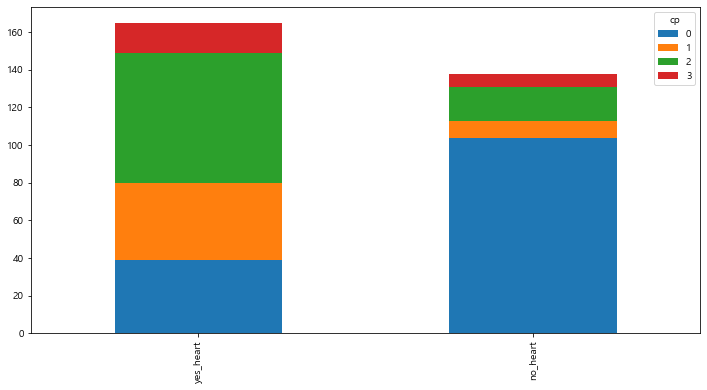

In [11]:
# 가슴통증유형 (0,1,2,3,4)
bar_chart('cp',['0','1','2','3','4'])

# 2,1,0,3 의 통증유형순으로 심장병 case가 많음
# 심장병이 없는 대부분의 경우 0

,0,1
yes_heart,142,23
no_heart,116,22


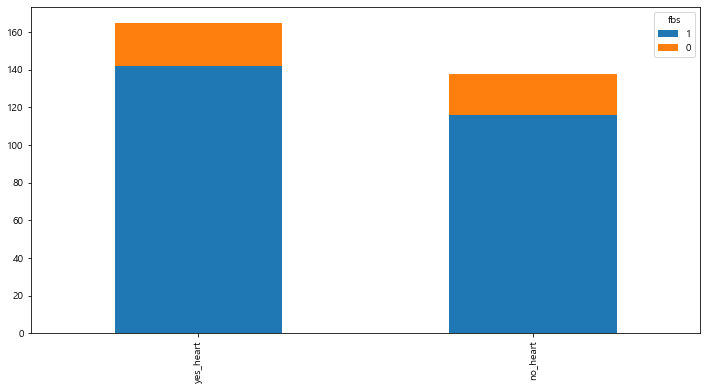

In [12]:
# 공복혈당 ( 120이상, 1=true, 0=False )
bar_chart('fbs',['1','0'])

,0,1,2
yes_heart,68,96,1
no_heart,79,56,3


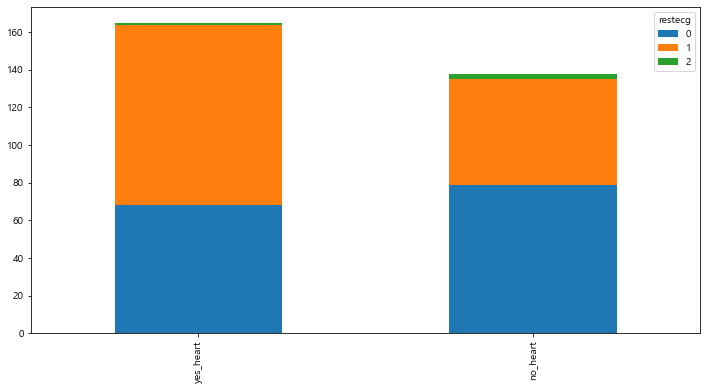

In [13]:
# 안정 심전도 결과 (0,1,2)
bar_chart('restecg',['0','1','2'])

,0,1
yes_heart,142,23
no_heart,62,76


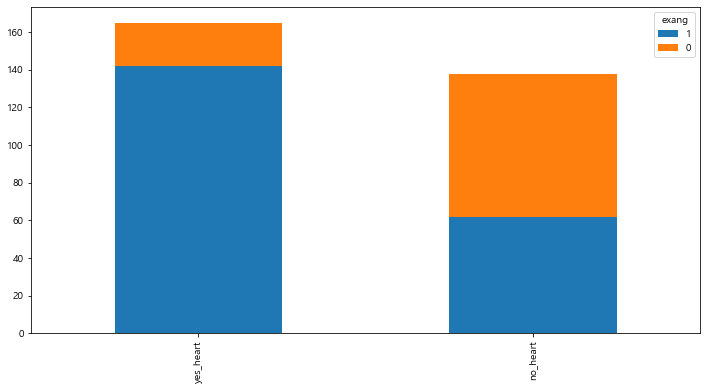

In [14]:
# 협심증 유발 운동 (1=yes, 0=no)
bar_chart('exang',['1','0'])

,0,1,2,3
yes_heart,1,6,130,28
no_heart,1,12,36,89


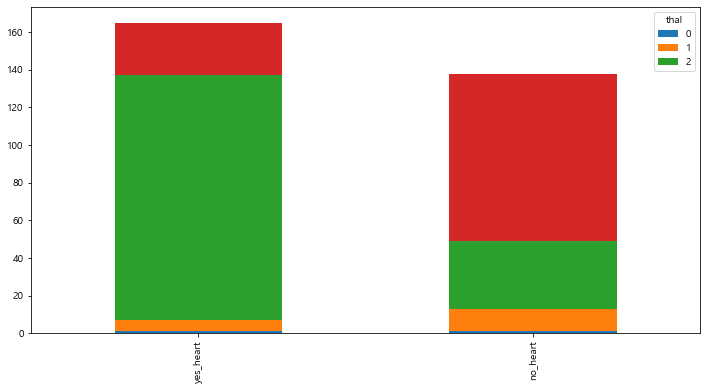

In [15]:
# ???
bar_chart('thal',['0','1','2'])

,0,1,2
yes_heart,9,49,107
no_heart,12,91,35


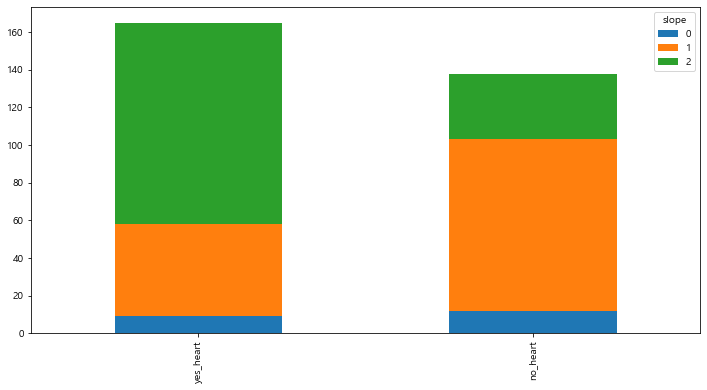

In [16]:
# 최대 운동 ST 기울기
bar_chart('slope',['0','1','2'])

,0,1,2,3,4
yes_heart,130,21,7,3,4
no_heart,45,44,31,17,1


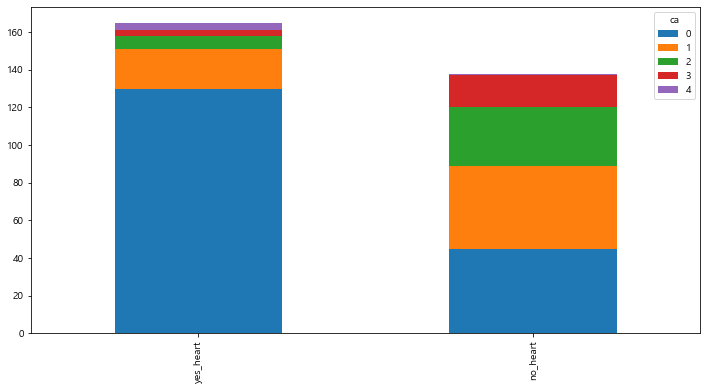

In [17]:
# ca => 형광 투시된 주요 혈관의 수 (0~4)
bar_chart('ca',['0','1','2','3','4'])

In [18]:
# modeling 1

# category feature들 더미변수로 만들지 않음
# 단순히 시각화 결과로 input 변수 선정

dependent_variable = df['target']
independent_variables = df[['age','thalach','oldpeak','sex','cp','restecg','exang','thal','slope','ca']] 

x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.3, random_state=0)

model_1 = LogisticRegression() #로지스틱 회귀분석 시행

model_1.fit(x_train, y_train) #모델의 정확도 확인

print('학습용 데이터셋 정확도 : %.2f' % model_1.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % model_1.score(x_test, y_test))


학습용 데이터셋 정확도 : 0.86
검증용 데이터셋 정확도 : 0.81


In [19]:
y_pred=model_1.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [20]:
# get 오즈비

independent_variables_with_constant = sm.add_constant(independent_variables,prepend=True) ##

result = sm.Logit(dependent_variable, independent_variables_with_constant).fit()

Optimization terminated successfully.
         Current function value: 0.357418
         Iterations 7


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 Dec 2019   Pseudo R-squ.:                  0.4814
Time:                        16:01:32   Log-Likelihood:                -108.30
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 9.781e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3438      2.338      0.575      0.565      -3.239       5.926
age           -0.0192      0.022     -0.881      0.378      -0.062       0.024
thalach        0.0177      0.010      1.808      0.071      -0.001       0.037
oldpeak       -0.5965      0.209     -2.852      0.004      -1.006      -0.187
sex           -1.5136      0.425     -3.562      0.000      -2.346      -0.681
cp             0.8333      0.179      4.643      0.000       0.482       1.185
restecg        0.5415      0.335      1.616      0.106      -0.115       1.198
exang         -1.0424      0.396     -2.630      0.009      -1.819      -0.266
thal          -0.9187      0.278     -3.301      0.001      -1.464      -0.373
slope          0.5384      0.344      1.565      0.118      -0.136       1.213
ca            -0.7436      0.186     -3.991      0.000      -1.109      -0.378
==============================================================================
"""

In [22]:
np.exp(result.params)

const      3.833432
age        0.980950
thalach    1.017838
oldpeak    0.550709
sex        0.220111
cp         2.301007
restecg    1.718652
exang      0.352602
thal       0.399026
slope      1.713332
ca         0.475400
dtype: float64

In [23]:
## modeling 2

In [24]:
df[category] = df[category].astype('category')
df['target'] =df['target'].astype('category')

In [25]:
tmp_col = ['sex','cp','restecg','exang','thal','slope','ca']

In [26]:
# category -> dummy

def get_dummies(feature):
    
    global df
    
    t_list = []
    for i in feature:
        t = pd.get_dummies(df[i],prefix=i,drop_first=True)
        t_list.append(t)
        
    result_df = df[numeric].join(t_list)
    result_df['target'] = df['target']
    
    return result_df

In [27]:
result_df = get_dummies(tmp_col)

In [31]:
result_df.iloc[:,:-1].columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'exang_1', 'thal_1', 'thal_2',
       'thal_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4'],
      dtype='object')

In [32]:
# modeling 2

# category feature들 더미변수로 만듬
# model_1과 같은 input 변수들

dependent_variable = result_df['target']
independent_variables = result_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'exang_1', 'thal_1', 'thal_2',
       'thal_3', 'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4']]
x_train, x_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.3, random_state=0)

model_2 = LogisticRegression() #로지스틱 회귀분석 시행

model_2.fit(x_train, y_train) #모델의 정확도 확인

print('학습용 데이터셋 정확도 : %.2f' % model_2.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % model_2.score(x_test, y_test))


학습용 데이터셋 정확도 : 0.89
검증용 데이터셋 정확도 : 0.84


In [33]:
y_pred=model_2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.82      0.87      0.85        47

   micro avg       0.84      0.84      0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



In [34]:
# get 오즈비

independent_variables_with_constant = sm.add_constant(independent_variables,prepend=True) ##

result = sm.Logit(dependent_variable, independent_variables_with_constant).fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.297382093506233
            Iterations: 151
            Function evaluations: 163
            Gradient evaluations: 151


In [35]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.568     
Dependent Variable: target           AIC:              224.2135  
Date:               2019-12-18 16:03 BIC:              305.9157  
No. Observations:   303              Log-Likelihood:   -90.107   
Df Model:           21               LL-Null:          -208.82   
Df Residuals:       281              LLR p-value:      1.3589e-38
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     151.0000                                     
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          0.1550    3.8791   0.0400  0.9681  -7.4479   7.7578
age            0.0275    0.0254   1.0815  0.2795  -0.0223   0.0773
trestbps      -0.0248    0.0117  -2.1124  0.0346  -0.0478  -0.0018
chol          -0.0041    0.0042  -0.9634  0.3353  -0.0124   0.0042
thalach        0.0203    0.0119   1.7124  0.0868  -0.0029   0.0435
oldpeak       -0.4152    0.2415  -1.7195  0.0855  -0.8884   0.0581
sex_1         -1.8340    0.5699  -3.2183  0.0013  -2.9509  -0.7171
cp_1           0.8758    0.5735   1.5270  0.1268  -0.2483   1.9999
cp_2           2.0735    0.5235   3.9609  0.0001   1.0475   3.0996
cp_3           2.4700    0.7174   3.4429  0.0006   1.0639   3.8762
restecg_1      0.4617    0.3997   1.1552  0.2480  -0.3216   1.2450
restecg_2     -0.7836    2.7458  -0.2854  0.7753  -6.1652   4.5980
exang_1       -0.7506    0.4503  -1.6670  0.0955  -1.6332   0.1319
thal_1         2.4972    2.9114   0.8577  0.3910  -3.2090   8.2034
thal_2         2.1725    2.8238   0.7693  0.4417  -3.3621   7.7071
thal_3         0.7112    2.8274   0.2515  0.8014  -4.8303   6.2527
slope_1       -0.8013    0.8771  -0.9136  0.3609  -2.5203   0.9177
slope_2        0.6322    0.9430   0.6704  0.5026  -1.2160   2.4805
ca_1          -2.2850    0.5169  -4.4204  0.0000  -3.2981  -1.2718
ca_2          -3.4038    0.7969  -4.2714  0.0000  -4.9657  -1.8420
ca_3          -2.1233    0.9116  -2.3293  0.0198  -3.9100  -0.3367
ca_4           1.4512    1.7973   0.8074  0.4194  -2.0714   4.9737
=================================================================

"""

In [37]:
np.exp(result.params)

const         1.167624
age           1.027885
trestbps      0.975501
chol          0.995937
thalach       1.020506
oldpeak       0.660210
sex_1         0.159771
cp_1          2.400818
cp_2          7.952814
cp_3         11.822914
restecg_1     1.586720
restecg_2     0.456753
exang_1       0.472067
thal_1       12.148672
thal_2        8.780185
thal_3        2.036452
slope_1       0.448755
slope_2       1.881767
ca_1          0.101778
ca_2          0.033245
ca_3          0.119632
ca_4          4.268042
dtype: float64